<a href="https://colab.research.google.com/github/GreNinja47/ML-Clustering/blob/main/NGO_Donation_K_Mean_%26_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the python libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
import warnings
warnings.filterwarnings("ignore")

### 1. Reading and Inspecting the Data

In [ ]:
# Reading the Countries file

df=pd.read_csv("Country-data.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [ ]:
# The Definition of given column names

df1=pd.read_csv("data-dictionary+.csv")
df1

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [ ]:
# Examining the shape of the Countries datset

df.shape

(167, 10)

In [ ]:
# Examining the columns names of the Countries datset

df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [ ]:
# Describing the Countries datset

df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [ ]:
# Decribing the values in the Countries datset

df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


### 2. Cleaning the Data

In [ ]:
# Checking the Columns Data Types

df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [ ]:
# Examining the null values in the datset

df.isnull().sum()/len(df)*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [ ]:
# Checking if there is any repeatation of country names in dataset

df.country.duplicated().sum()

0

In [ ]:
# Converting exports,imports and health spending percentages to absolute values.

df['exports'] =df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100



In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### 3.Data Visualization

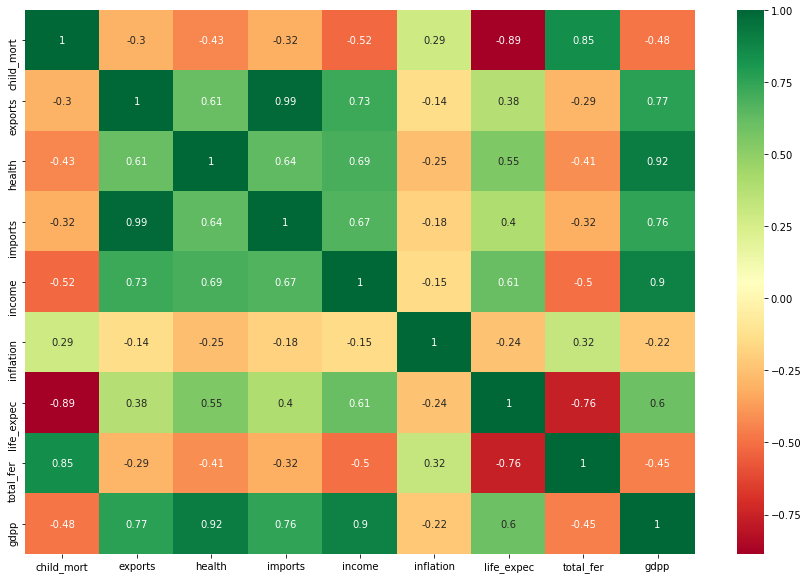

In [ ]:
# Heatmap to understand the attributes dependency

plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True,cmap='RdYlGn')

plt.show()

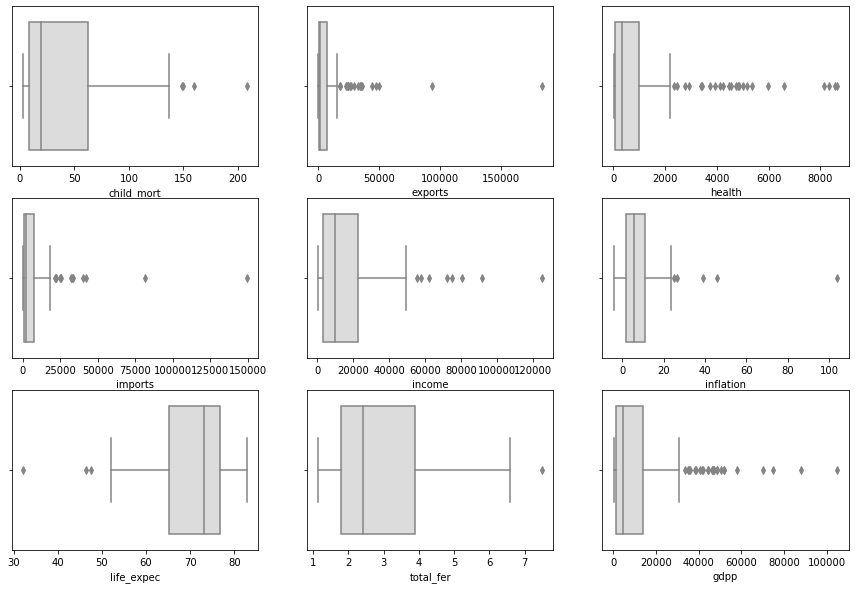

In [ ]:
plt.figure(figsize = (15,10))
features = df.columns[1:]
for i in enumerate(features):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(df[i[1]],palette='coolwarm')

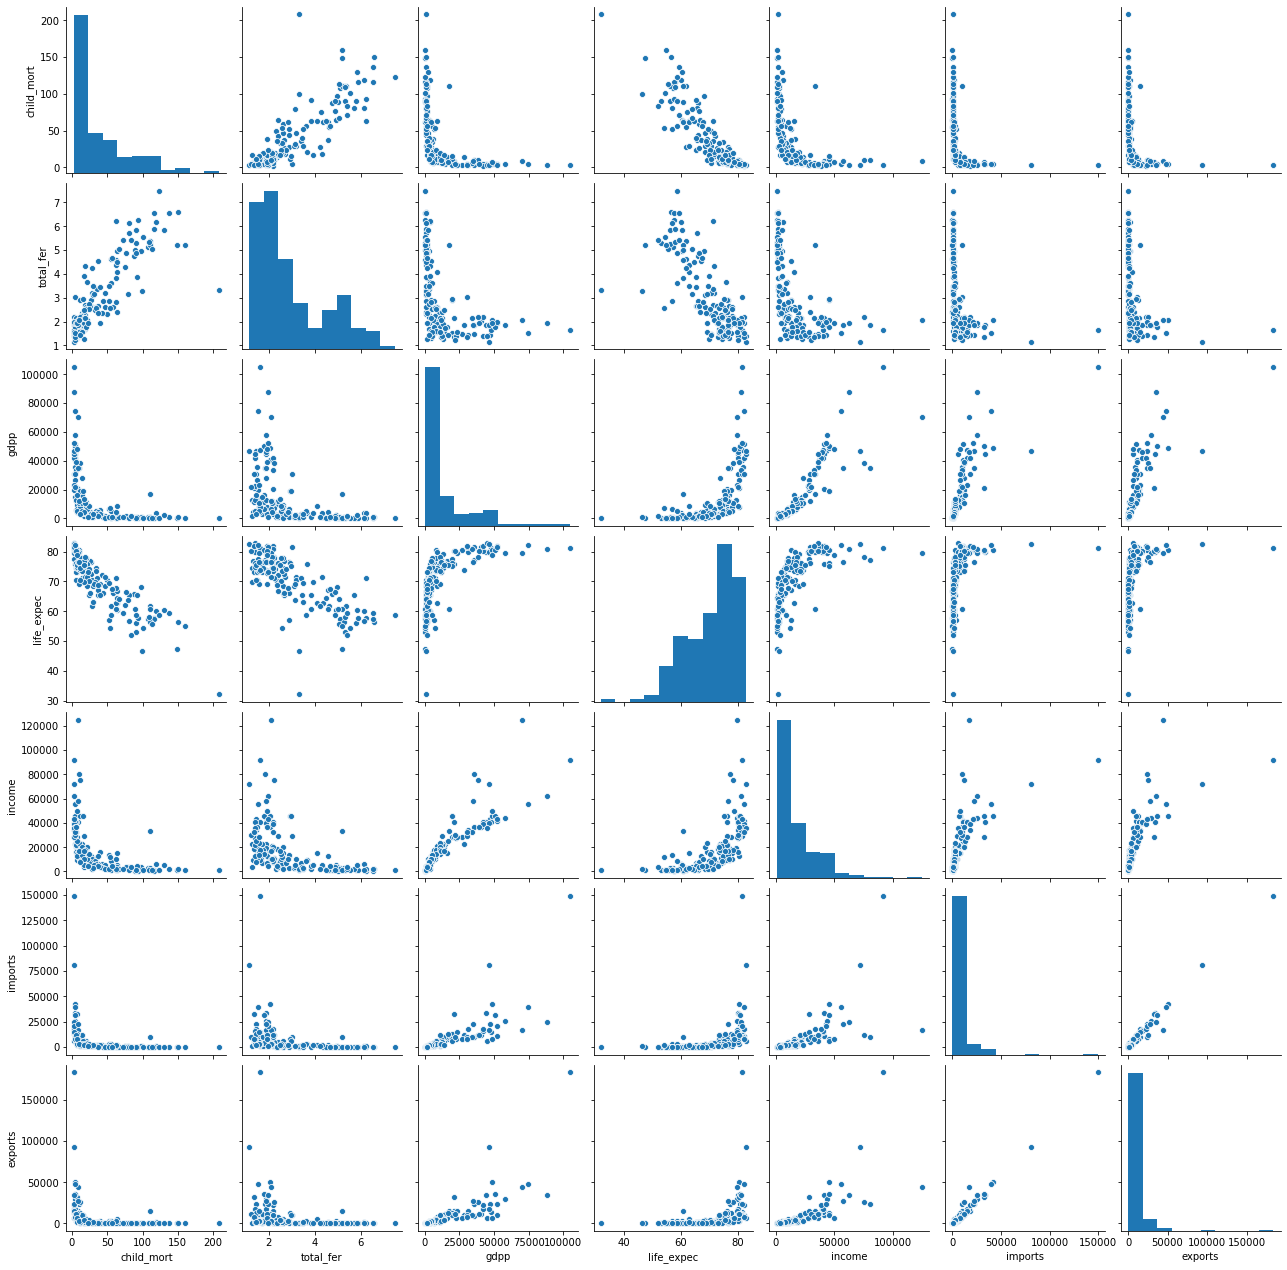

In [ ]:
sns.pairplot(df, vars=["child_mort", 'total_fer','gdpp','life_expec','income', 'imports', 'exports'], kind='scatter')
plt.show()

#### Note: The crucial areas that influence the direst aid requirements for the countries are its child mortality, income and GDP per capita, so going forward we need to provide more emphasizes will be given in these areas majorly.

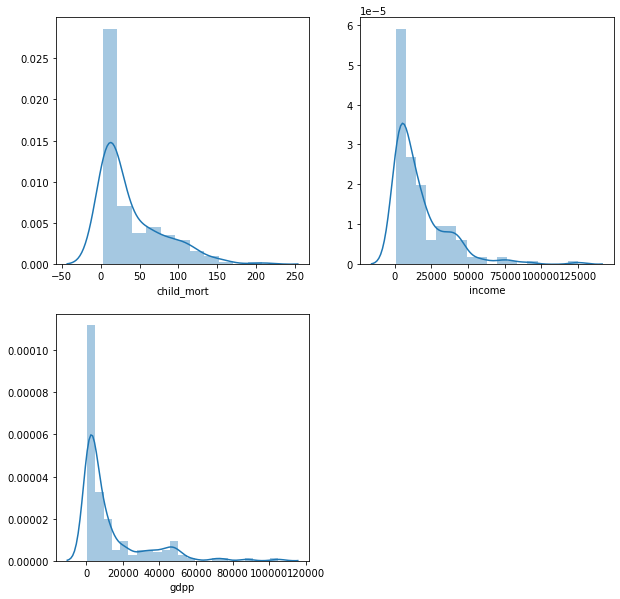

In [ ]:
plt.figure(figsize=(10, 10))
features = ['child_mort', 'income','gdpp']
for i in enumerate(features):
    plt.subplot(2, 2, i[0]+1)
    sns.distplot(df[i[1]])

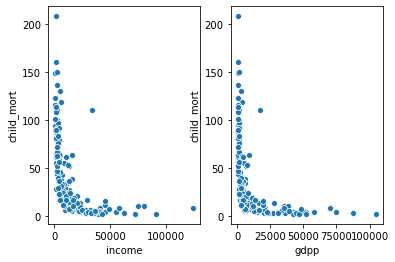

In [ ]:
plt.subplot(1, 2, 1)
sns.scatterplot(x='income',y='child_mort', data=df)

plt.subplot(1, 2, 2)
sns.scatterplot(x='gdpp',y='child_mort', data=df)


#### Note: lower income and lower gdpp of a nation is contributing towards child mortality

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

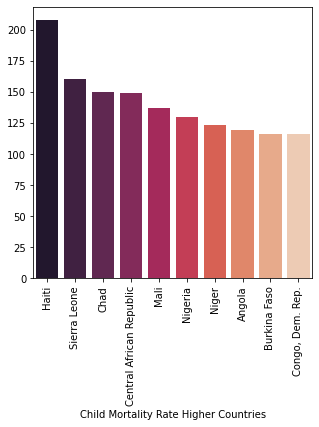

In [ ]:
fig, axs = plt.subplots(0,0, figsize = (5,5))

# Child Mortality Rate

child_mortality = df[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= child_mortality, palette='rocket')
plt1.set(xlabel = 'Child Mortality Rate Higher Countries', ylabel= '')
plt.xticks(rotation=90)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

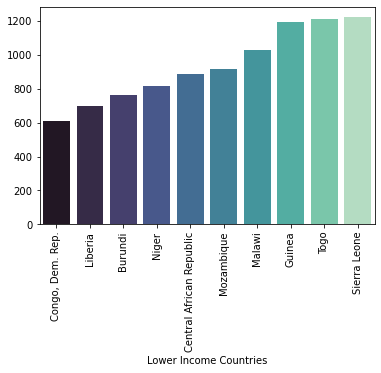

In [ ]:
# Lower Income Countries

Lower_income = df[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= Lower_income, palette='mako')
plt1.set(xlabel = 'Lower Income Countries', ylabel= '')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

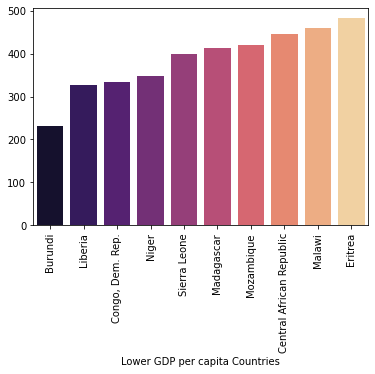

In [ ]:
# Lower GDP per capita Countries

Lower_GDP = df[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= Lower_GDP, palette='magma')
plt1.set(xlabel = 'Lower GDP per capita Countries', ylabel= '')
plt.xticks(rotation=90)

### 4. Data Analysis

#### Handling the Outliers

In [ ]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [ ]:
q1 = df['exports'].quantile(0.99)
q2 = df['health'].quantile(0.99)
q3 = df['imports'].quantile(0.99)
q4 = df['income'].quantile(0.99)
q5 = df['inflation'].quantile(0.99)
q6 = df['total_fer'].quantile(0.99)
q7 = df['gdpp'].quantile(0.99)

df['exports'][df['exports']>= q1] = q1
df['health'][df['health']>= q2] = q2
df['imports'][df['imports']>= q3] = q3
df['income'][df['income']>= q4] = q4
df['inflation'][df['inflation']>= q5] = q5
df['total_fer'][df['total_fer']>= q6] = q6
df['gdpp'][df['gdpp']>= q7] = q7

# Excluding child_mortality and life_expectance we have included all remaining columns

In [ ]:
#Outliers after treatment
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,6538.214776,1054.206622,5873.135222,16857.550898,7.380970,70.555689,2.942259,12756.826347
std,40.328931,11415.308590,1790.845342,9422.700869,17957.012855,7.793224,8.893172,1.498340,17430.208938
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.800000,6.563600,79088.000000


#### 5. Finding the Hopkins Score

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [ ]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [ ]:
hopkins(df.drop('country', axis = 1))

0.934082278636949

### 6. Feature Scaling

In [ ]:
# importing scikit-learn libraries

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [ ]:

scaler = StandardScaler()
df1 = scaler.fit_transform(df.drop('country', axis = 1))
df1

array([[ 1.29153238, -0.56962212, -0.56695778, ..., -1.61909203,
         1.92639646, -0.70225949],
       [-0.5389489 , -0.47385792, -0.4403934 , ...,  0.64786643,
        -0.86505432, -0.49872564],
       [-0.27283273, -0.42399973, -0.48627082, ...,  0.67042323,
        -0.03498262, -0.47743428],
       ...,
       [-0.37231541, -0.49160668, -0.54024972, ...,  0.28695762,
        -0.66423052, -0.65869853],
       [ 0.44841668, -0.53995007, -0.55242911, ..., -0.34463279,
         1.15657191, -0.65869853],
       [ 1.11495062, -0.52701632, -0.54227159, ..., -2.09278484,
         1.64524315, -0.6500669 ]])

In [ ]:
df1 = pd.DataFrame(df1, columns = df.columns[1:])
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.569622,-0.566958,-0.598741,-0.851668,0.265002,-1.619092,1.926396,-0.702259
1,-0.538949,-0.473858,-0.440393,-0.413584,-0.386946,-0.372075,0.647866,-0.865054,-0.498726
2,-0.272833,-0.424000,-0.486271,-0.476100,-0.221053,1.122161,0.670423,-0.034983,-0.477434
3,2.007808,-0.381249,-0.534088,-0.463973,-0.612045,1.932987,-1.179234,2.153997,-0.530950
4,-0.695634,-0.086742,-0.178410,0.139728,0.125254,-0.764618,0.704258,-0.543736,-0.032042


In [ ]:
df1.shape

(167, 9)

### 7. K - Mean Clustering

For n_clusters = 2 The average silhouette_score is : 0.46945658285687586
For n_clusters = 3 The average silhouette_score is : 0.4035259981391569
For n_clusters = 4 The average silhouette_score is : 0.3919682996098615
For n_clusters = 5 The average silhouette_score is : 0.38416316490898117
For n_clusters = 6 The average silhouette_score is : 0.2794504699835839
For n_clusters = 7 The average silhouette_score is : 0.30744910306203266
For n_clusters = 8 The average silhouette_score is : 0.32077928559271507
For n_clusters = 9 The average silhouette_score is : 0.29800900621649495


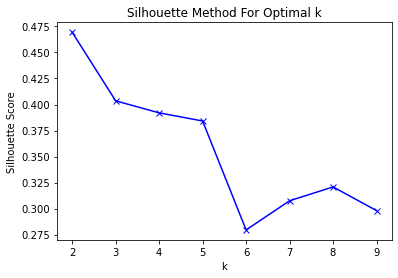

In [ ]:
# Finding the silhouette score

silhouette_scores = []
K = range(2, 10)

for k in K:
    km = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=45).fit_predict(df1)
    scr = silhouette_score(df1, km)
    silhouette_scores.append(scr)
    print("For n_clusters =", k, "The average silhouette_score is :", scr)
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

##### We can consider the Silhouette Score has 3 has its highest after 2.

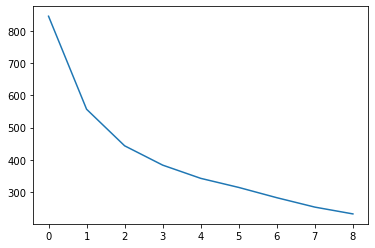

In [ ]:
ssd = []
range_n_clusters = range(2, 11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df1)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

##### We see 2 elbow curve, one is pointing at x axis 1 which is 3 & another at x axis 2 which is  4, so we can consider the consider the least point 3 as K value, K = 3.

In [ ]:
# K-Mean with k =3
kmeans = KMeans(n_clusters = 3, max_iter = 50, random_state= 50)
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [ ]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [ ]:

Final_Kmean = df.copy()
Final_Kmean ['Kmean_cluster_num']= pd.Series(kmeans.labels_)
Final_Kmean.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmean_cluster_num
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.490,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.100,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.440,76.8,2.13,12200.0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.900,75.8,2.37,10300.0,0
6,Armenia,18.1,669.76,141.6800,1458.660,6700.0,7.770,73.3,1.69,3220.0,0
7,Australia,4.8,10276.20,4530.8700,10847.100,41400.0,1.160,82.0,1.93,51900.0,1
8,Austria,4.3,24059.70,5159.0000,22418.200,43200.0,0.873,80.5,1.44,46900.0,1
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000.0,13.800,69.1,1.92,5840.0,0


In [ ]:
#Finding the Values of Kmean clustering numbers

Final_Kmean.Kmean_cluster_num.value_counts()

0    90
2    48
1    29
Name: Kmean_cluster_num, dtype: int64

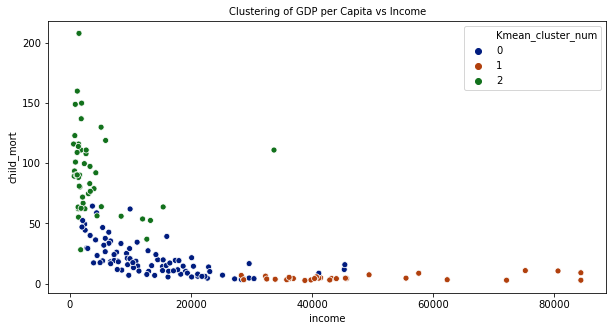

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'income', y = 'child_mort', hue = 'Kmean_cluster_num', data = Final_Kmean, palette = 'dark')
plt.title('Clustering of GDP per Capita vs Income', size=10)

plt.show()

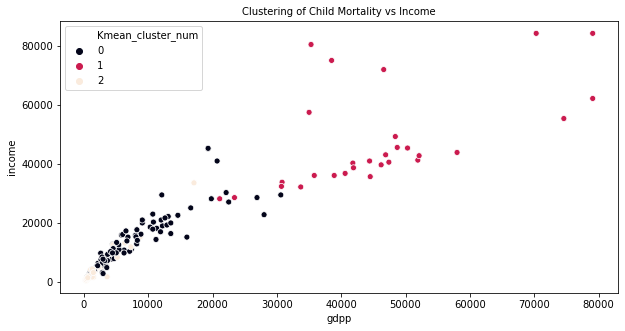

In [ ]:
# Plotting the clusters
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'gdpp', y = 'income', hue = 'Kmean_cluster_num', data = Final_Kmean, palette = 'rocket')
plt.title('Clustering of Child Mortality vs Income', size=10)

plt.show()

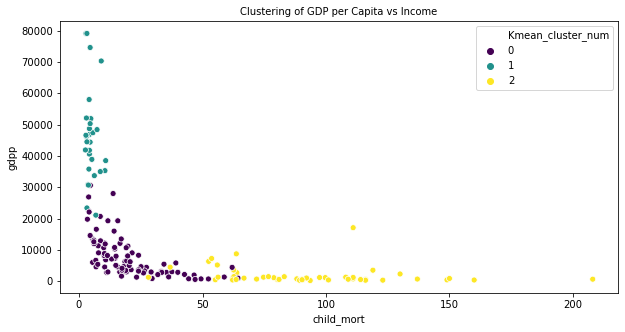

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'Kmean_cluster_num', data = Final_Kmean, palette = 'viridis')
plt.title('Clustering of GDP per Capita vs Income', size=10)

plt.show()

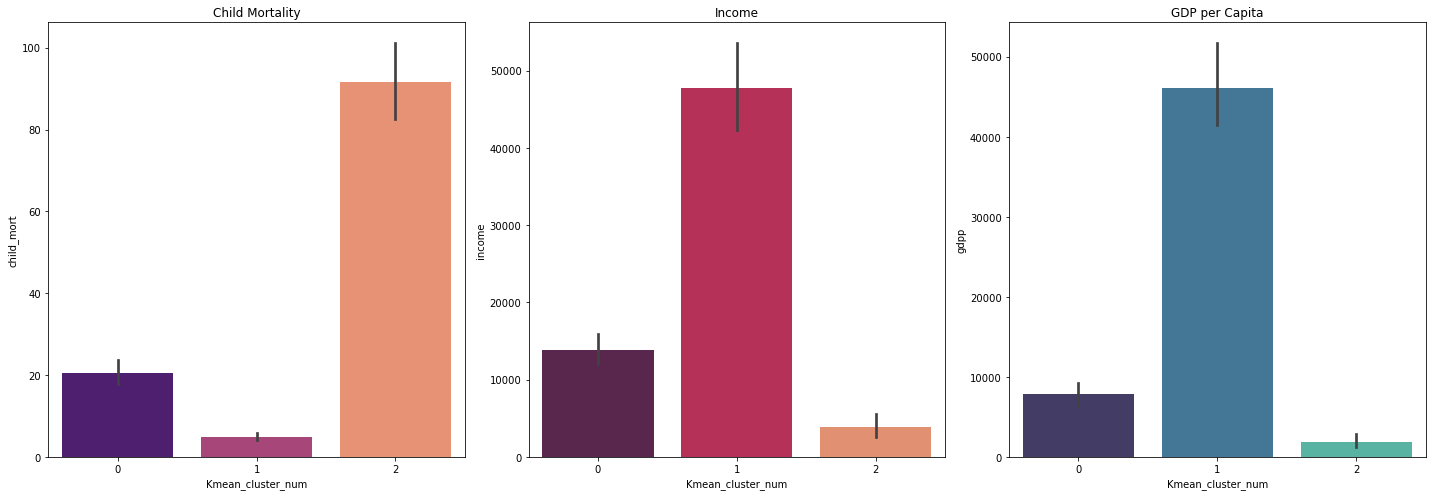

In [ ]:
# visualising the above clusters in barplot

plt.figure(figsize=(20,7))
plt.subplot(1,3,1)

sns.barplot(x = 'Kmean_cluster_num', y = 'child_mort', data=Final_Kmean, palette="magma")
plt.title('Child Mortality')

plt.subplot(1,3,2)
sns.barplot(x = 'Kmean_cluster_num', y = 'income', data=Final_Kmean, palette="rocket")
plt.title('Income')

plt.subplot(1,3,3)
sns.barplot(x = 'Kmean_cluster_num', y = 'gdpp', data=Final_Kmean, palette="mako")
plt.title('GDP per Capita')

plt.tight_layout()

plt.show()

#### Observations:
1. Developed = Cluster 2 has highest Child Mortality rate with lowest Income and GDP per Capita.
2. Under Developed = Cluster 1 has Lowest Child Mortality rate with highest Income and GDP per Capita.
3. Developing = Cluster 0 has Low Child Mortality rate with low Income and GDP per Capita.

In [ ]:
# Qucik Insight into the countries that forms Cluster under 2

Countries_in_Cluster2 = Final_Kmean[Final_Kmean['Kmean_cluster_num'] == 2]
Countries_in_Cluster2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmean_cluster_num
0,Afghanistan,90.2,55.300,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,2
3,Angola,119.0,2199.190,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,2
17,Benin,111.0,180.404,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,2
21,Botswana,52.5,2768.600,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,2
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,2


In [ ]:
# Qucik Insight into the countries that forms Cluster under 0

Countries_in_Cluster0 = Final_Kmean[Final_Kmean['Kmean_cluster_num'] == 0]
Countries_in_Cluster0.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmean_cluster_num
1,Albania,16.6,1145.20,267.895,1987.74,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.982,1400.44,12900.0,16.10,76.5,2.89,4460.0,0
4,Antigua and Barbuda,10.3,5551.00,735.660,7185.80,19100.0,1.44,76.8,2.13,12200.0,0
5,Argentina,14.5,1946.70,834.300,1648.00,18700.0,20.90,75.8,2.37,10300.0,0
6,Armenia,18.1,669.76,141.680,1458.66,6700.0,7.77,73.3,1.69,3220.0,0


In [ ]:
# Qucik Insight into the countries that forms Cluster under 1

Countries_in_Cluster1 = Final_Kmean[Final_Kmean['Kmean_cluster_num'] == 1]
Countries_in_Cluster1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmean_cluster_num
7,Australia,4.8,10276.2,4530.87,10847.1,41400.0,1.160,82.0,1.93,51900.0,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200.0,0.873,80.5,1.44,46900.0,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100.0,1.880,80.0,1.86,44400.0,1
23,Brunei,10.5,23792.2,1002.52,9884.0,80600.0,16.700,77.1,1.84,35300.0,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700.0,2.870,81.3,1.63,47400.0,1


### 8. Cluster profilling of 3 cluster types with countries child mortality, income and GDP

In [ ]:
Final_Kmean.country.value_counts

<bound method IndexOpsMixin.value_counts of 0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object>

In [ ]:
# Sorting based on high child mortality, low income and GDP

Sorting_Countries=Final_Kmean[Final_Kmean['Kmean_cluster_num'] == 2].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True])
Sorting_Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmean_cluster_num
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,2
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,2


In [ ]:
Sorting_Countries_head=Sorting_Countries[['country']]
Sorting_Countries_head= Sorting_Countries_head.reset_index(drop=True)
Sorting_Countries_head.head()

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali


In [ ]:
# Creating a new df for clustering mean for further analysis

Cluster_mean = Final_Kmean.groupby(['Kmean_cluster_num']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
Cluster_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Kmean_cluster_num,,,,,,,,,
2,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333
0,20.547778,3477.015539,528.894338,3588.133568,13804.333333,7.110944,73.393333,2.242444,7808.577778
1,4.982759,25405.359310,4239.330028,21316.695862,47784.413793,2.876690,80.479310,1.754138,46068.137931


In [ ]:
# Grouping the number of rows that form each clusters

Cluster_mean['row_counts']=Final_Kmean[['child_mort','Kmean_cluster_num']].groupby(['Kmean_cluster_num']).count()
Cluster_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,row_counts
Kmean_cluster_num,,,,,,,,,,
2,91.610417,879.063521,114.821765,827.028771,3897.354167,10.608604,59.239583,4.972233,1909.208333,48
0,20.547778,3477.015539,528.894338,3588.133568,13804.333333,7.110944,73.393333,2.242444,7808.577778,90
1,4.982759,25405.359310,4239.330028,21316.695862,47784.413793,2.876690,80.479310,1.754138,46068.137931,29


In [ ]:
Top_5_Countries = Final_Kmean[Final_Kmean['Kmean_cluster_num']== 2]
Top_5_Countries = Top_5_Countries.sort_values(by = ['gdpp','income','child_mort'], ascending=[True, True, False])
Top_5_Countries[['country']].head()



,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone


#### Observation: The result of K-mean Clustering of Cluster 2 (Under Developed Countries) tels us that the following countries are in direst need of aid.

1. Burundi
2. Liberia
3. Congo. Dem. Rep.
4. Niger
5. Sierra Leone

### 9. Hierarchical Clustering

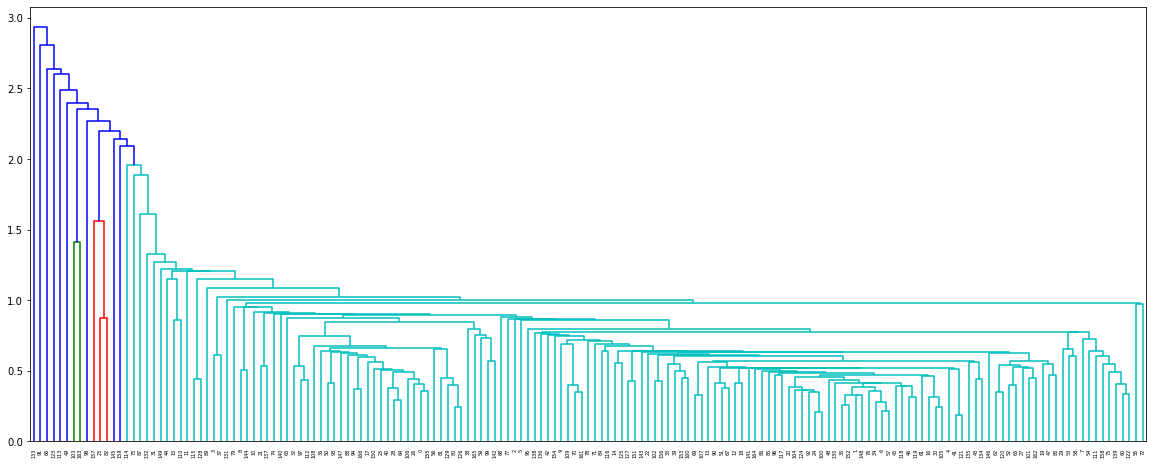

In [ ]:
# Plotting the Single Linkage grpah

plt.figure(figsize = (20,8))
mergings = linkage(df1, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Observation : In Single Linkage we aren't able to gather the proper insight on dendrogram for us to derive an conclusion out of the graph so we would require to plot complete linkage for further analysis.

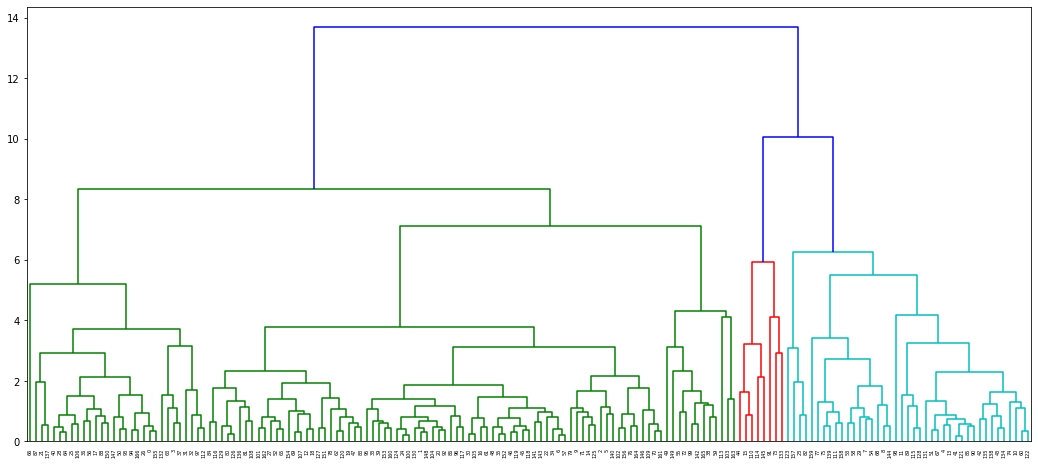

In [ ]:
# Plotting the complete linkage grpah

plt.figure(figsize = (18,8))
mergings = linkage(df1, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

#### Observation : From the above dendrogram plot we can cut the y-axis at 10 that results in 3 verticle lines

In [ ]:
# Creating the labels
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df['Hist_cluster_labels'] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hist_cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [ ]:
df.shape

(167, 11)

In [ ]:
df.Hist_cluster_labels.value_counts()

0    118
1     41
2      8
Name: Hist_cluster_labels, dtype: int64

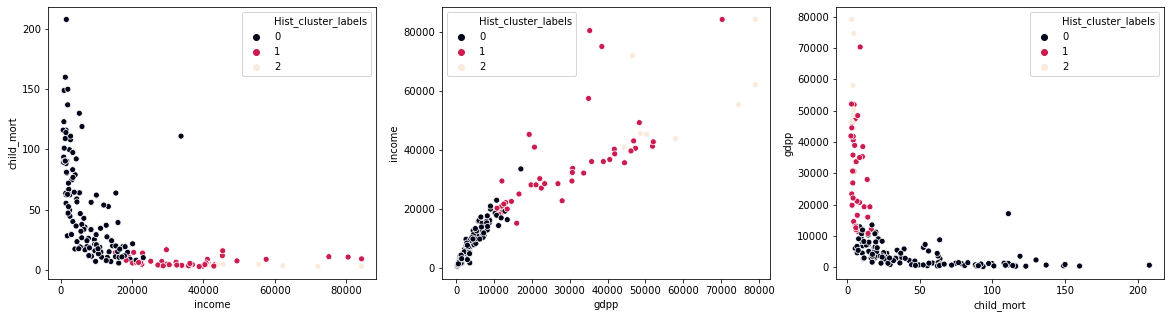

In [ ]:
# Plotting the Scatter plot to analysis the variables across 3 clusters

plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='income', y='child_mort', hue='Hist_cluster_labels', data=df, palette="rocket")

plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='Hist_cluster_labels',data=df, palette="rocket")

plt.subplot(1, 3, 3)
sns.scatterplot(x='child_mort', y='gdpp', hue='Hist_cluster_labels', data=df, palette="rocket")

plt.show()

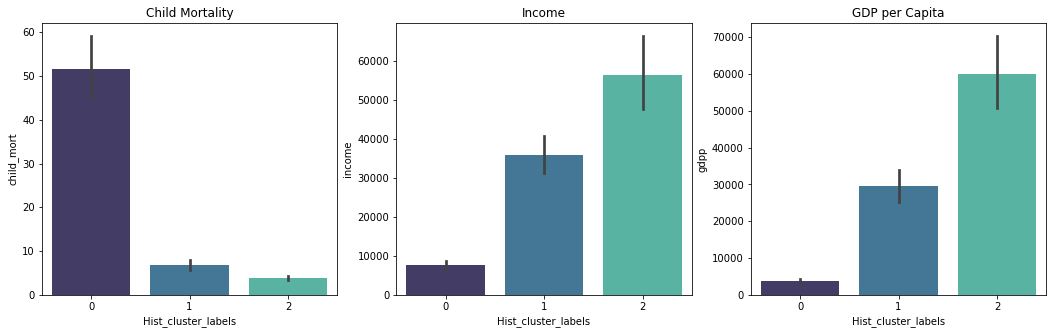

In [ ]:
# Plotting the Bar plot to analysis the variables across 3 clusters

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.barplot(x = 'Hist_cluster_labels', y = 'child_mort', data=df, palette="mako")
plt.title('Child Mortality')

plt.subplot(1,3,2)
sns.barplot(x = 'Hist_cluster_labels', y = 'income', data=df, palette="mako")
plt.title('Income')

plt.subplot(1,3,3)
sns.barplot(x = 'Hist_cluster_labels', y = 'gdpp', data=df, palette="mako")
plt.title('GDP per Capita')

plt.show()

#### Observations:
1. Under Developed = Cluster 0 has highest Child Mortality rate with lowest Income and GDP per Capita.

In [ ]:
df[df['Hist_cluster_labels'] == 0].head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hist_cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700.0,20.90,75.8,2.37,10300.0,0


In [ ]:
df_Countries=df[df['Hist_cluster_labels'] == 0].sort_values(by = ['child_mort','income', 'gdpp'], ascending = [False, True, True])
df_Countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Hist_cluster_labels
66,Haiti,208.0,101.286,45.7442,428.314,1500.0,5.45,32.1,3.3300,662.0,0
132,Sierra Leone,160.0,67.032,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,0
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.5,6.5636,897.0,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.5,5.2100,446.0,0
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.5,6.5500,708.0,0


In [ ]:
Sorting_Countries_head=df_Countries[['country']]
Sorting_Countries_head= Sorting_Countries_head.reset_index(drop=True)
Sorting_Countries_head.head()

,country
0,Haiti
1,Sierra Leone
2,Chad
3,Central African Republic
4,Mali


In [ ]:
# Creating a new df for clustering mean for further analysis

Heir_mean = df.groupby(['Hist_cluster_labels']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
Heir_mean

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Hist_cluster_labels,,,,,,,,,
0,51.512712,1466.113115,238.174789,1582.123747,7581.889831,9.187966,67.125424,3.417434,3732.322034
1,6.878049,13587.873171,2424.054156,11854.251220,35853.024390,3.313976,78.395122,1.811707,29492.682927
2,3.825000,45222.215000,6070.207550,38512.335000,56321.750000,1.571125,80.975000,1.727500,60097.000000


In [ ]:
# Finding the top5 nations per Hierarchical Clustering that are direst need of an aid

Top_5_Countries = df [df ['Hist_cluster_labels']== 0]
Top_5_Countries = Top_5_Countries.sort_values(by = ['gdpp','income','child_mort'], ascending=[True, True, False])
Top_5_Countries[['country']].head()

,country
26,Burundi
88,Liberia
37,"Congo, Dem. Rep."
112,Niger
132,Sierra Leone


#### Observation: The result of Hierarchical Clustering of Cluster 0 (Under Developed Countries) tels us that the following countries are in direst need of aid.

1. Burundi
2. Liberia
3. Congo. Dem. Rep.
4. Niger
5. Sierra Leone

### 10. Final Analysis

In [ ]:
# K-Mean clustering Analysis

Kmean_cluster_per = Final_Kmean.Kmean_cluster_num.value_counts(normalize = True)*100
Kmean_cluster_per


0    53.892216
2    28.742515
1    17.365269
Name: Kmean_cluster_num, dtype: float64

In [ ]:

Kmean_Clustering_top5=Final_Kmean.sort_values(by = ['gdpp','income', 'child_mort']).head(5).copy()
Kmean_Clustering_top5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmean_cluster_num
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2


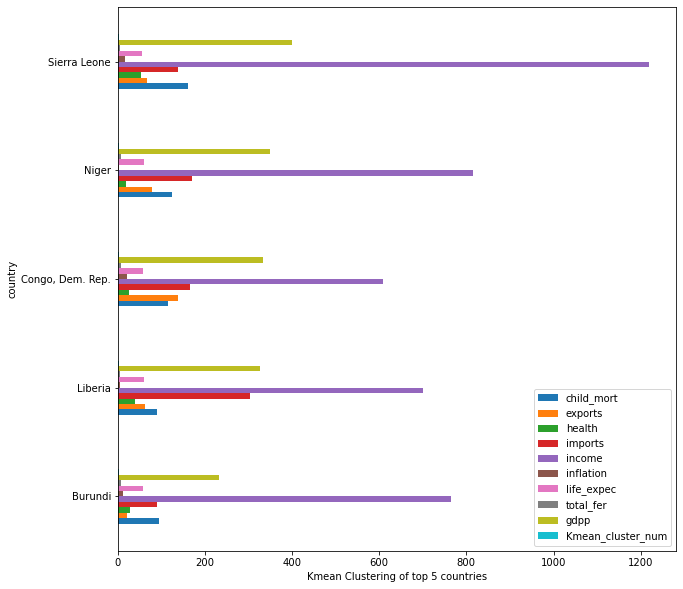

In [ ]:
KMean_plot = Kmean_Clustering_top5.set_index('country')
KMean_plot.plot.barh(figsize = (10,10))
plt.xlabel('Kmean Clustering of top 5 countries', )
plt.show()

In [ ]:
# Hierarchical Clustering Analysis

H_cluster_per = df.Hist_cluster_labels.value_counts(normalize = True)*100
H_cluster_per

0    70.658683
1    24.550898
2     4.790419
Name: Hist_cluster_labels, dtype: float64

In [ ]:
Hier_Clustering_top5=Final_Kmean.sort_values(by = ['gdpp','income', 'child_mort']).head(5).copy()
Hier_Clustering_top5

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmean_cluster_num
26,Burundi,93.6,20.6052,26.7960,90.552,764.0,12.30,57.7,6.2600,231.0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700.0,5.47,60.8,5.0200,327.0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609.0,20.80,57.5,6.5400,334.0,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,6.5636,348.0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220.0,17.20,55.0,5.2000,399.0,2


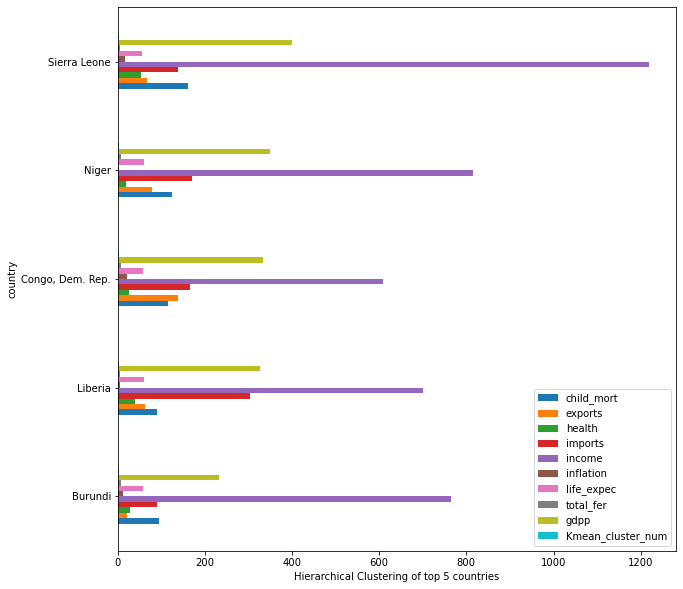

In [ ]:
KMean_plot = Hier_Clustering_top5.set_index('country')
KMean_plot.plot.barh(figsize = (10,10))
plt.xlabel('Hierarchical Clustering of top 5 countries', )
plt.show()

#### Final Verdict

After reading through the dataset and considerding the fact that GDP per Capita, Income per Person and Child Mortality rate are solely reasons for the direst, we can encourage the NGO to contribute there $10 Million aid to following countries as they are in their direst need to help.


1. Burundi
2. Liberia
3. Congo. Dem. Rep.
4. Niger
5. Sierra Leone